<h1>Discrete Accept Reject Sampler to Simulate draws from Binomial(n, p) using a Poisson proposal</h1>

Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal. \
NOTE:
- You need to assign values to ```n,p,λ``` such that the proposal plots similiarly to the simulator's plot.
- You can remove the line where I have set the seed number in order to generate different set of random numbers for the sampler(and hence random plots).

In [230]:
using Distributions
n = 100
p = .6
X = Binomial(n, p)

λ = 60
Y = Poisson(λ)

Poisson{Float64}(λ=60.0)

The below given plot represents Binomial distribution, Poisson Distribution(proposal) ans the modified Poisson distribution (which is c*Poisson Distribution).

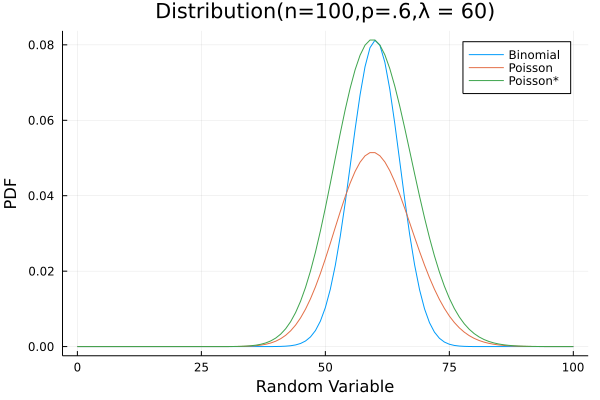

In [231]:
rep = n
binom = [pdf(X,i) for i in 0:n]
poiss = [pdf(Y,i) for i in 0:n]
all_c = [pdf(X,i)/pdf(Y,i) for i in 0:n]
c = maximum(all_c, dims = 1)[1] + 0.001
new_poiss = c * poiss
plot(0:n, [binom, poiss, new_poiss], title = "Distribution(n=100,p=.6,λ = 60)", xlabel = "Random Variable", ylabel = "PDF", label = ["Binomial" "Poisson" "Poisson*"])
# savefig("plot2_1.pdf")

In [232]:
function draw_poisson(λ)
    U = rand(Float64)
    i = 0
    p = exp(-λ)
    A = p
    X = 0
    while true
        if U < A
            X = i
            break
        else
            p = λ/(i + 1)*p
            A = A + p
            i = i + 1 
        end
    end
    return X
end

draw_poisson (generic function with 1 method)

In [233]:
using Plots
using Random
Random.seed!(1)
function AR(n,p::Float64,λ)
    accept = 0
    all_c = [pdf(X,i)/pdf(Y,i) for i in 0:n]
    c = maximum(all_c, dims = 1)[1] + 0.001
    rtn = 0
    while accept == 0
        U = rand(Float64)
        prop = draw_poisson(λ)
        ratio = pdf(X,prop)/(c*pdf(Y,prop))
        if true
            accept = 1
            rtn = prop
        end
    end
    return(rtn)
end

AR (generic function with 1 method)

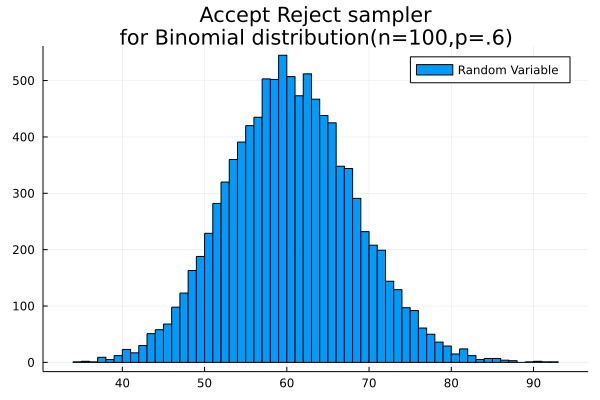

In [234]:
rep = 1e4
sample = [AR(n,p,λ) for i in 1:rep]
histogram(1:rep, sample, title = "Accept Reject sampler\nfor Binomial distribution(n=100,p=.6)", label = "Random Variable")
# savefig("plot2_2.pdf")